In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [22]:
# into a dataframe object 
df = pd.DataFrame(pd.read_excel("Kununu_Final.xlsx")) 
  
# show the dataframe
df.head()

,kununu Score,Vorgesetztenverhalten,Kollegenzusammenhalt,Interessante Aufgaben,Arbeitsatmosphäre,Kommunikation,Gleichberechtigung,Karriere / Weiterbildung,Gehalt / Sozialleistungen,Arbeitsbedingungen,Work-Life-Balance,Image,Umgang mit älteren Kollegen,Umwelt- / Sozialbewusstsein
0,1.1,1,1,1,1,1,1,1,1,1,2,1,1,1
1,4.4,4,5,5,5,4,4,5,4,5,3,5,4,4
2,4.2,5,5,4,4,5,2,5,5,5,2,2,5,5
3,4.5,4,5,4,5,4,4,5,5,4,4,5,5,4
4,2.2,2,3,2,3,3,1,1,2,3,2,2,2,2


In [23]:

df.isnull().sum()*100/df.shape[0]

kununu Score                   0.0
Vorgesetztenverhalten          0.0
Kollegenzusammenhalt           0.0
Interessante Aufgaben          0.0
Arbeitsatmosphäre              0.0
Kommunikation                  0.0
Gleichberechtigung             0.0
Karriere / Weiterbildung       0.0
Gehalt / Sozialleistungen      0.0
Arbeitsbedingungen             0.0
Work-Life-Balance              0.0
Image                          0.0
Umgang mit älteren Kollegen    0.0
Umwelt- / Sozialbewusstsein    0.0
dtype: float64

In [24]:
from sklearn.model_selection import train_test_split

# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)
df_train, df_test = train_test_split(df, train_size = 0.7, test_size = 0.3, random_state = 100)

In [25]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
num_vars = ['Vorgesetztenverhalten', 'Kollegenzusammenhalt'	, 'Interessante Aufgaben',	'Arbeitsatmosphäre'	, 'Kommunikation'	, 'Gleichberechtigung'	, 'Karriere / Weiterbildung', 	'Gehalt / Sozialleistungen',	'Arbeitsbedingungen','Work-Life-Balance'	, 'Image'	, 'Umgang mit älteren Kollegen',	'Umwelt- / Sozialbewusstsein']
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])
df.head()

,kununu Score,Vorgesetztenverhalten,Kollegenzusammenhalt,Interessante Aufgaben,Arbeitsatmosphäre,Kommunikation,Gleichberechtigung,Karriere / Weiterbildung,Gehalt / Sozialleistungen,Arbeitsbedingungen,Work-Life-Balance,Image,Umgang mit älteren Kollegen,Umwelt- / Sozialbewusstsein
0,1.1,1,1,1,1,1,1,1,1,1,2,1,1,1
1,4.4,4,5,5,5,4,4,5,4,5,3,5,4,4
2,4.2,5,5,4,4,5,2,5,5,5,2,2,5,5
3,4.5,4,5,4,5,4,4,5,5,4,4,5,5,4
4,2.2,2,3,2,3,3,1,1,2,3,2,2,2,2


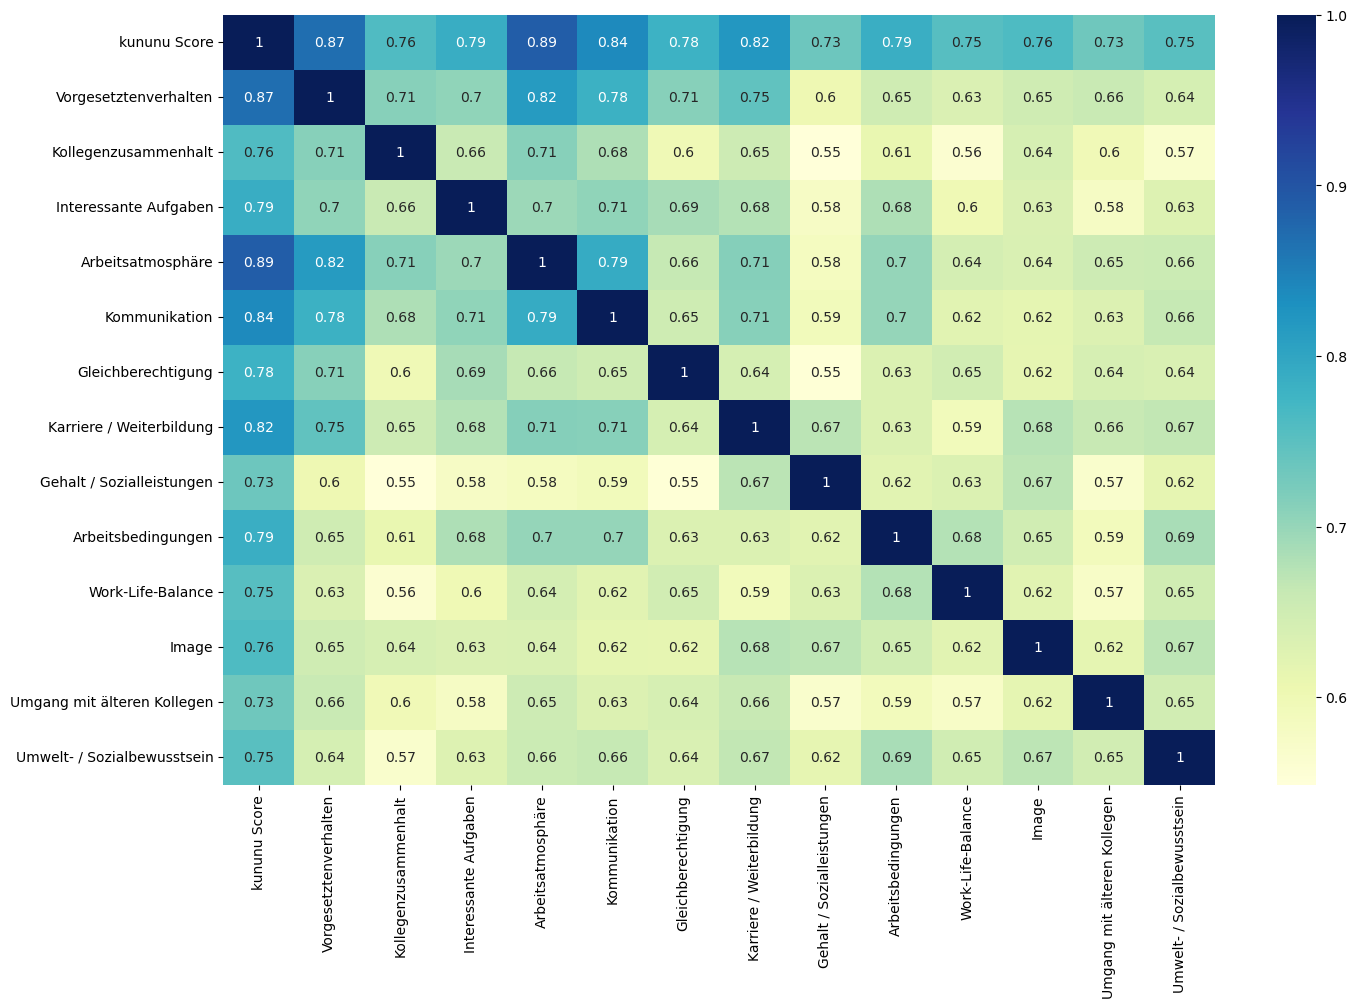

In [26]:
plt.figure(figsize = (16, 10))
sns.heatmap(df_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

In [27]:
y_train = df_train.pop('kununu Score')
X_train = df_train


In [28]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score

In [29]:
# Running RFE with the output number of the variable equal to 10
lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression()

In [30]:
from sklearn.metrics import r2_score 
y_train_kununu = lm.predict(X_train)

In [31]:
rfe = RFE(lm)         
rfe = rfe.fit(X_train, y_train)

In [32]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('Vorgesetztenverhalten', True, 1),
 ('Kollegenzusammenhalt', False, 6),
 ('Interessante Aufgaben', False, 5),
 ('Arbeitsatmosphäre', True, 1),
 ('Kommunikation', False, 2),
 ('Gleichberechtigung', True, 1),
 ('Karriere / Weiterbildung', True, 1),
 ('Gehalt / Sozialleistungen', True, 1),
 ('Arbeitsbedingungen', True, 1),
 ('Work-Life-Balance', False, 3),
 ('Image', False, 4),
 ('Umgang mit älteren Kollegen', False, 7),
 ('Umwelt- / Sozialbewusstsein', False, 8)]

In [33]:
col = X_train.columns[rfe.support_]
col

Index(['Vorgesetztenverhalten', 'Arbeitsatmosphäre', 'Gleichberechtigung',
       'Karriere / Weiterbildung', 'Gehalt / Sozialleistungen',
       'Arbeitsbedingungen'],
      dtype='object')

In [34]:
X_train.columns[~rfe.support_]

Index(['Kollegenzusammenhalt', 'Interessante Aufgaben', 'Kommunikation',
       'Work-Life-Balance', 'Image', 'Umgang mit älteren Kollegen',
       'Umwelt- / Sozialbewusstsein'],
      dtype='object')

In [35]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]

In [36]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_rfe = sm.add_constant(X_train_rfe)
lm = sm.OLS(y_train,X_train_rfe).fit()   # Running the linear model
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:           kununu Score   R-squared:                       0.929
Model:                            OLS   Adj. R-squared:                  0.928
Method:                 Least Squares   F-statistic:                     956.0
Date:                Fri, 01 Dec 2023   Prob (F-statistic):          4.70e-248
Time:                        11:18:47   Log-Likelihood:                -71.956
No. Observations:                 445   AIC:                             157.9
Df Residuals:                     438   BIC:                             186.6
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

In [37]:
y_train_kununu = lm.predict(X_train_rfe)
res = (y_train_kununu- y_train)

In [38]:
num_vars = ['Vorgesetztenverhalten', 'Kollegenzusammenhalt'	, 'Interessante Aufgaben',	'Arbeitsatmosphäre'	, 'Kommunikation'	, 'Gleichberechtigung'	, 'Karriere / Weiterbildung', 	'Gehalt / Sozialleistungen',	'Arbeitsbedingungen','Work-Life-Balance'	, 'Image'	, 'Umgang mit älteren Kollegen',	'Umwelt- / Sozialbewusstsein']
df_test[num_vars] = scaler.fit_transform(df_test[num_vars])

In [39]:
y_test = df_test.pop('kununu Score')
X_test = df_test
# Adding constant variable to test dataframe
X_test = sm.add_constant(X_test)
# Now let's use our model to make predictions.
# Creating X_test_new dataframe by dropping variables from X_test
X_test_rfe = X_test[X_train_rfe.columns]
# Making predictions
y_pred = lm.predict(X_test_rfe)
from sklearn.metrics import r2_score 
r2_score(y_test, y_pred)


0.9506854725624494

Text(0, 0.5, 'y_pred')

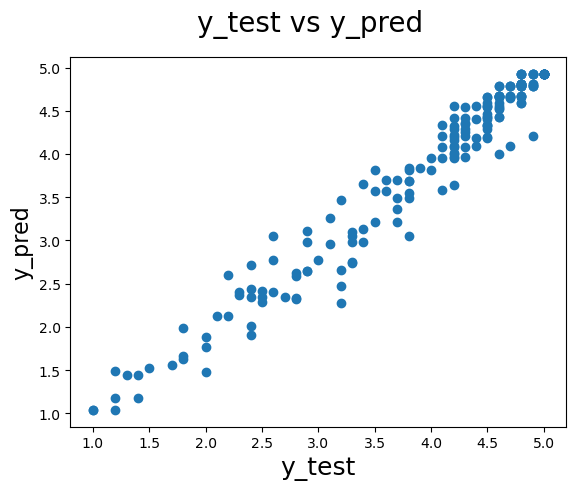

In [40]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)                          # Y-label